In [ ]:
# Install required libraries
!pip install -U "flwr[simulation]"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.0/540.0 kB 25.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
  Attempting uninstall: typer
    Found existing installation: typer 0.15.3
    Uninstalling typer-0.15.3

📌 Step 1: Upload the Dataset

🎯 Objective: Manually upload the Breast Cancer Wisconsin (Diagnostic)dataset into Google Colab.

In [ ]:
from google.colab import files
import pandas as pd

# Prompt the user to upload the file manually
print("Please upload the dataset (Breast Cancer Wisconsin (Diagnostic).csv)")
uploaded = files.upload()

# Read the uploaded file
df = pd.read_csv("Breast Cancer Wisconsin (Diagnostic).csv")

# Display dataset info
print("Dataset Overview:")
print(df.info())

# Show first few rows
df.head()

Please upload the dataset (Breast Cancer Wisconsin (Diagnostic).csv)


Saving Breast Cancer Wisconsin (Diagnostic).csv to Breast Cancer Wisconsin (Diagnostic).csv
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se               

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


✅ Step 2: Initial Cleaning – Drop ID, Check Labels, Handle Duplicates


📌 Step 2 – Title: Clean Unnecessary Columns and Explore Label Distribution


🎯 Objective:


Remove irrelevant columns (like id), check the class distribution, and ensure no missing or duplicated data before preprocessing.



In [ ]:
# Drop 'id' column if it exists
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)
    print("✅ Dropped 'id' column.")

# Check for missing values
print("\n🔍 Checking for missing values:")
print(df.isnull().sum())

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\n🔁 Duplicate rows found: {duplicates}")

# Check the unique classes in the diagnosis column
print("\n📊 Diagnosis Value Counts:")
print(df['diagnosis'].value_counts())

# Preview of the dataset
df.head()


✅ Dropped 'id' column.

🔍 Checking for missing values:
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimensi

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


✅ Step 3: Clean Columns, Encode Labels, Check Distributions

📌 Step 3 – Title: Drop empty column, encode labels, visualize data

🎯 Objective:


Remove the empty column (Unnamed: 32)

Convert diagnosis labels (‘M’, ‘B’) into binary values (1, 0)

Plot class distribution and feature histogram

Prepare for normalization



✅ Dropped empty column: Unnamed: 32

✅ Encoded 'diagnosis' column: M → 1, B → 0


<ipython-input-4-0ccd55a6e511>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette='Set2')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


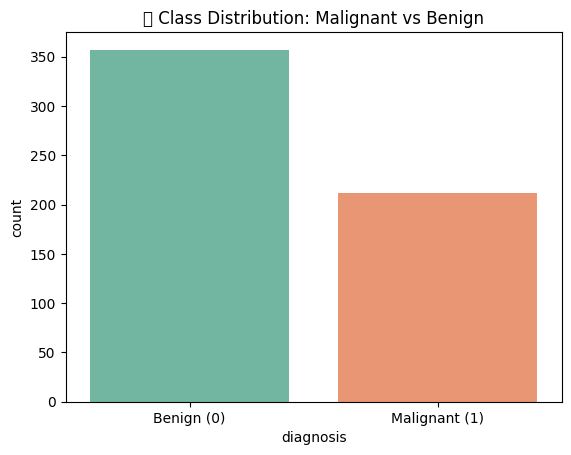

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop empty column
if 'Unnamed: 32' in df.columns:
    df.drop(columns=['Unnamed: 32'], inplace=True)
    print("✅ Dropped empty column: Unnamed: 32")

# Encode labels: M = 1 (malignant), B = 0 (benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print("\n✅ Encoded 'diagnosis' column: M → 1, B → 0")

# Plot class distribution
sns.countplot(data=df, x='diagnosis', palette='Set2')
plt.title("📊 Class Distribution: Malignant vs Benign")
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.show()

# Preview dataset after encoding
df.head()


✅ Step 4: Outlier Detection + Feature Normalization


📌 Title: Detect and Clip Outliers + Normalize Features


🎯 Objective:


Identify and clip outliers using 2×IQR method

Apply StandardScaler for normalization

Visualize distribution before and after normalization



In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Separate features and target
features = df.drop(columns=['diagnosis'])
target = df['diagnosis']

# Step 1: Outlier clipping using 2×IQR
def clip_outliers(df, multiplier=2.0):
    df_clipped = df.copy()
    for col in df_clipped.columns:
        Q1 = df_clipped[col].quantile(0.25)
        Q3 = df_clipped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - multiplier * IQR
        upper = Q3 + multiplier * IQR
        df_clipped[col] = np.clip(df_clipped[col], lower, upper)
    return df_clipped

features_clipped = clip_outliers(features, multiplier=2.0)
print("✅ Outliers clipped using 2×IQR method.")

# Step 2: Normalize using StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_clipped)

# Convert back to DataFrame
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['diagnosis'] = target.values

# Preview result
print("✅ Features normalized and combined with target:")
df_scaled.head()


✅ Outliers clipped using 2×IQR method.
✅ Features normalized and combined with target:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.132211,-2.094880,1.309240,1.110259,1.588618,3.075470,2.743485,2.551051,2.267649,2.411698,...,-1.362388,2.346746,2.289334,1.323522,2.774205,2.173661,2.296076,2.902357,2.107748,1
1,1.883318,-0.354743,1.735678,2.126180,-0.833381,-0.493159,-0.015928,0.553602,0.007030,-0.905923,...,-0.369479,1.565487,2.164664,-0.376515,-0.439329,-0.143542,1.087084,-0.241364,0.322425,1
2,1.627126,0.464699,1.613236,1.741693,0.955415,1.093896,1.414255,2.052532,0.964162,-0.406172,...,-0.023268,1.374715,1.675878,0.535484,1.156704,0.885231,1.955000,1.283668,0.236385,1
3,-0.780490,0.259838,-0.600020,-0.811863,3.322728,3.075470,1.983740,1.463138,2.930565,3.051438,...,0.135140,-0.249275,-0.582633,3.209499,3.158622,2.050484,2.175786,2.902357,2.969339,1
4,1.801802,-1.162412,1.828566,2.035529,0.286236,0.564617,1.422021,1.439770,-0.004143,-0.580784,...,-1.470171,1.365630,1.410706,0.225581,-0.315886,0.636906,0.729259,-0.923475,-0.408912,1


✅ Step 5: Visualization Before Federated Splitting

📌 Title: Visualize Feature Distributions (After Normalization)

🎯 Objective:

Understand how well the features have been scaled and whether the distribution is approximately Gaussian. Also helps ensure that no strange outlier patterns remain before client partitioning.



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


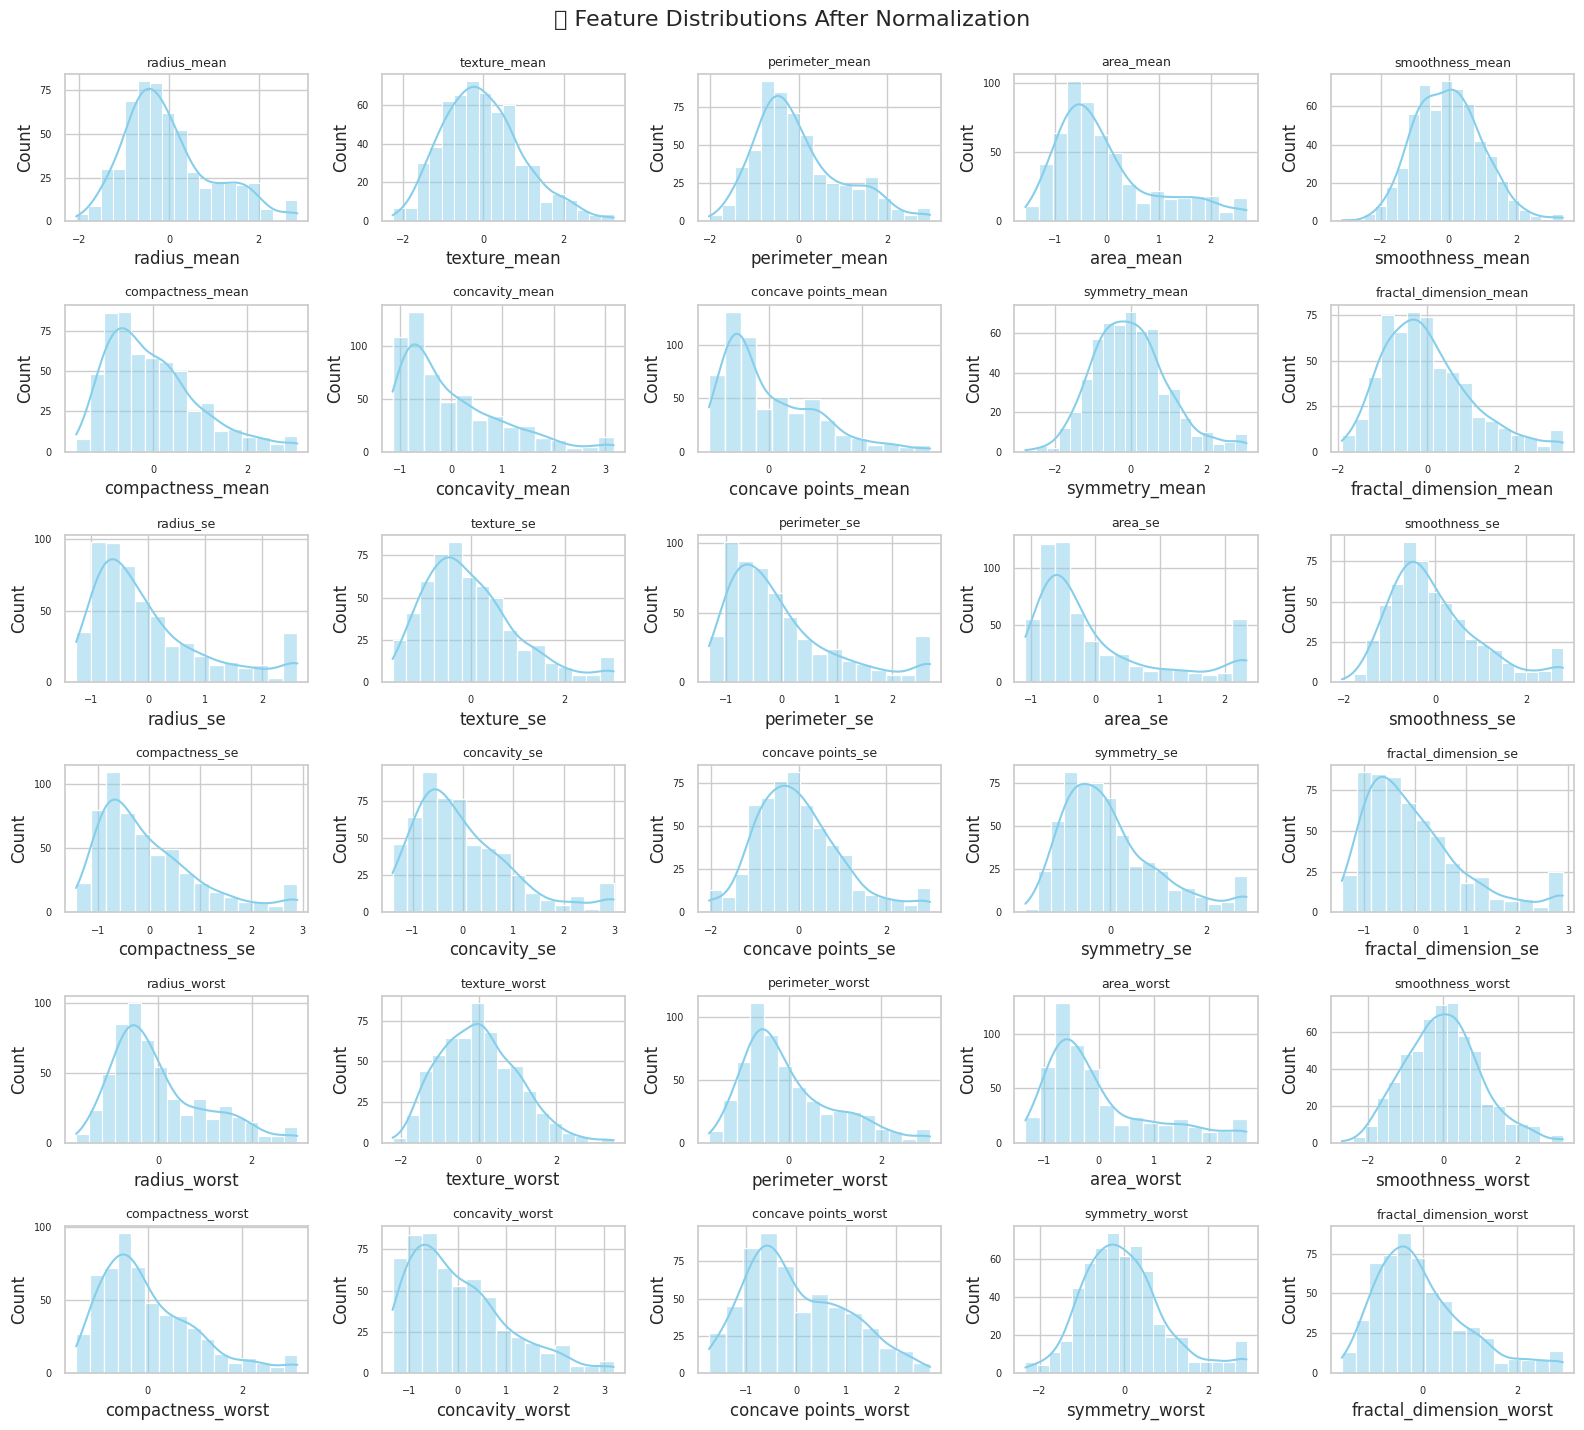

<ipython-input-6-468ca293942d>:28: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


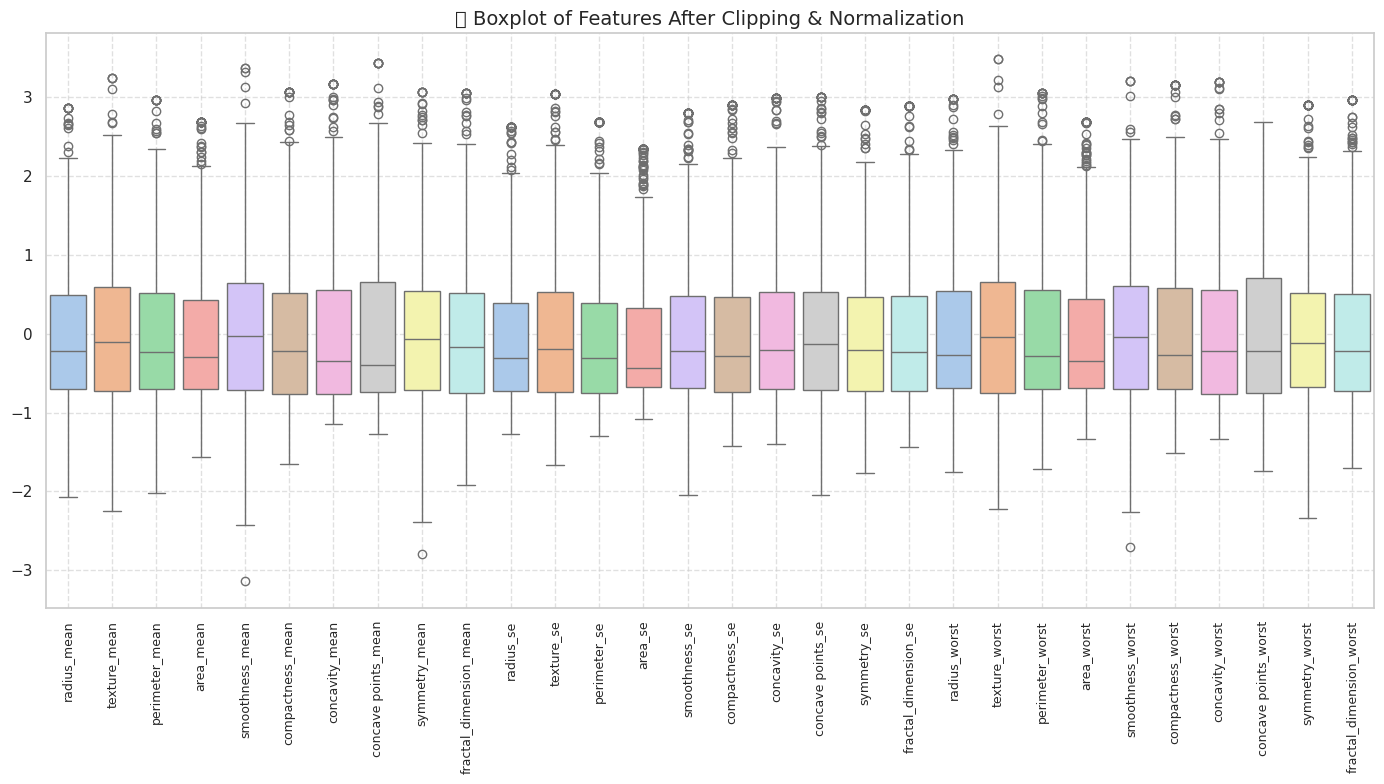

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Define feature columns (exclude target)
feature_cols = df_scaled.columns[:-1]

# Plot histograms
plt.figure(figsize=(16, 14))
for i, col in enumerate(feature_cols):
    plt.subplot(6, 5, i+1)
    sns.histplot(df_scaled[col], kde=True, color='skyblue')
    plt.title(col, fontsize=9)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
plt.tight_layout()
plt.suptitle("📊 Feature Distributions After Normalization", fontsize=16, y=1.02)
plt.show()

# Plot boxplots to verify outlier clipping
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_scaled[feature_cols], palette="pastel")
plt.xticks(rotation=90, fontsize=9)
plt.title("🧪 Boxplot of Features After Clipping & Normalization", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


✅ Step 6: Simulate Federated Clients (Non-IID Partitioning)

📌 Title: Split Dataset Among Clients for Federated Learning

🎯 Objective:

Simulate a federated learning environment by dividing the dataset between 5 clients in a non-IID manner — meaning each client receives a different distribution of classes (some more malignant, some more benign).



In [ ]:
import numpy as np

# Shuffle dataset
df_scaled = df_scaled.sample(frac=1, random_state=42).reset_index(drop=True)
print("✅ Dataset shuffled successfully.")

# Define number of clients
num_clients = 5

# Function to split non-IID using Dirichlet distribution
def split_non_iid(df, num_clients, alpha=0.5):
    """
    Splits data non-IID across clients using Dirichlet distribution.
    Smaller alpha → more heterogeneity (non-IID)
    """
    labels = df['diagnosis'].values
    label_classes = np.unique(labels)
    idxs = np.arange(len(df))
    client_indices = [[] for _ in range(num_clients)]

    for label in label_classes:
        label_idxs = idxs[labels == label]
        proportions = np.random.dirichlet(np.repeat(alpha, num_clients))
        proportions = (np.cumsum(proportions) * len(label_idxs)).astype(int)[:-1]
        split_idxs = np.split(label_idxs, proportions)
        for i in range(num_clients):
            client_indices[i].extend(split_idxs[i])

    return [df.iloc[idxs] for idxs in client_indices]

# Apply partitioning
client_datasets = split_non_iid(df_scaled, num_clients=num_clients, alpha=0.5)

# Save and show client dataset info
for i, client_df in enumerate(client_datasets):
    print(f"📦 Client {i+1}: {client_df.shape[0]} samples (Diagnosis 1s: {client_df['diagnosis'].sum()})")


✅ Dataset shuffled successfully.
📦 Client 1: 115 samples (Diagnosis 1s: 79)
📦 Client 2: 9 samples (Diagnosis 1s: 8)
📦 Client 3: 73 samples (Diagnosis 1s: 65)
📦 Client 4: 88 samples (Diagnosis 1s: 56)
📦 Client 5: 284 samples (Diagnosis 1s: 4)


✅ Step 7: Convert Client Data for Training (NumPy Arrays)

📌 Title: Prepare NumPy Arrays for Federated Learning Clients

🎯 Objective:

Convert each client’s data into X_train, y_train format for use in federated learning models.



In [ ]:
# Convert each client DataFrame into (X, y) numpy arrays
client_data = []

for i, client_df in enumerate(client_datasets):
    X = client_df.drop(columns=["diagnosis"]).values
    y = client_df["diagnosis"].values
    client_data.append((X, y))
    print(f"✅ Client {i+1} data ready: X shape = {X.shape}, y shape = {y.shape}")


✅ Client 1 data ready: X shape = (115, 30), y shape = (115,)
✅ Client 2 data ready: X shape = (9, 30), y shape = (9,)
✅ Client 3 data ready: X shape = (73, 30), y shape = (73,)
✅ Client 4 data ready: X shape = (88, 30), y shape = (88,)
✅ Client 5 data ready: X shape = (284, 30), y shape = (284,)


✅ Step 8: Define Model + Federated Client Class

📌 Title: Build Neural Network & Create Federated Client

🎯 Objective: Define a neural network suitable for binary
classification, and wrap it in a Flower-compatible NumPyClient to support local training, evaluation, and parameter exchange.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Create the neural network model
def create_model():
    model = Sequential([
        Dense(16, activation='relu', input_shape=(30,)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 2: Define Flower federated client
import flwr as fl

class FederatedClient(fl.client.NumPyClient):
    def __init__(self, client_id):
        self.client_id = client_id
        self.model = create_model()
        self.X_train, self.y_train = client_data[client_id]

    def get_parameters(self, config):
        return self.model.get_weights()

    def set_parameters(self, parameters):
        self.model.set_weights(parameters)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        self.model.fit(self.X_train, self.y_train, epochs=5, batch_size=16, verbose=0)
        return self.get_parameters(config), len(self.X_train), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = self.model.evaluate(self.X_train, self.y_train, verbose=0)
        return loss, len(self.X_train), {"accuracy": accuracy}


✅ Step 9: Federated Learning with FedAvg

📌 Title: Execute Federated Learning using FedAvg

🎯 Objective:

To initialize all simulated clients, define the FedAvg aggregation strategy, and run federated training using the Flower framework for 5 communication rounds.

This setup simulates decentralized learning across clients that hold non-IID, unbalanced subsets of the Breast Cancer dataset.



In [ ]:
# Step 1: Initialize clients
num_clients = len(client_data)
clients = [FederatedClient(i) for i in range(num_clients)]
print(f"✅ {num_clients} clients initialized.")

# Step 2: Define the FedAvg strategy
import flwr as fl
strategy = fl.server.strategy.FedAvg()

# Step 3: Start the federated simulation
fl.simulation.start_simulation(
    client_fn=lambda cid: clients[int(cid)],   # Return client by ID
    num_clients=num_clients,                   # Total number of clients
    config=fl.server.ServerConfig(num_rounds=5),  # Number of communication rounds
    strategy=strategy                          # Use Federated Averaging strategy
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.



✅ 5 clients initialized.


2025-05-10 11:13:33,224	INFO worker.py:1771 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'memory': 7991255040.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0, 'object_store_memory': 3995627520.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      No `client_resources` specified. Using minimal resources for clients.
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 2 actors
INFO :      [INIT]
INFO :      Requesting initial parameters from one random client
(pid=2792) 2025-05-10 11:13:37.892848: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(pid=2792) WARNING: All log messages before absl::InitializeLog() i

History (loss, distributed):
	round 1: 0.5174334423194241
	round 2: 0.359635086334024
	round 3: 0.2380679598853961
	round 4: 0.1638990611047443
	round 5: 0.12675467756804348

✅ Step 10: Evaluate Final Global Model (FedAvg)

📌 Title: Aggregate and Evaluate Final Model After FedAvg Training

🎯 Objective:

Aggregate the final model weights after 5 communication rounds, apply them to a new global model instance, and evaluate its performance on the full (preprocessed and normalized) dataset.



In [ ]:
from flwr.common import FitRes, Status, Code, ndarrays_to_parameters

# Step 1: Aggregate final parameters from all clients
results = [
    (i, FitRes(
        parameters=ndarrays_to_parameters(client.get_parameters({})),
        num_examples=len(client.X_train),
        status=Status(Code.OK, "Success"),
        metrics={}
    )) for i, client in enumerate(clients)
]
failures = []

# Step 2: Aggregate using FedAvg strategy
final_parameters, _ = strategy.aggregate_fit(0, results, failures)
final_weights = fl.common.parameters_to_ndarrays(final_parameters)

# Step 3: Create a new model and assign final weights
global_model = create_model()
global_model.set_weights(final_weights)

# Step 4: Evaluate on full dataset
X_test = df_scaled.drop(columns=['diagnosis']).values
y_test = df_scaled['diagnosis'].values

loss_fedavg, accuracy_fedavg = global_model.evaluate(X_test, y_test, verbose=0)

print(f"✅ Final FedAvg Model Evaluation - Loss: {loss_fedavg:.4f}, Accuracy: {accuracy_fedavg:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Final FedAvg Model Evaluation - Loss: 0.6890, Accuracy: 0.3831


✅ Step 11: AWA – Phase 1: Train Clients and Collect Local Accuracy

📌 Title: Train Each Client and Collect Their Local Accuracy (For AWA Aggregation)

🎯 Objective:

Train each client independently using the current global model weights, then evaluate and record their local accuracy and sample count. These metrics will later be used to compute adaptive aggregation weights in AWA.


This step replaces the simple sample-based weighting in FedAvg with a smarter weighting based on performance + data volume.



In [ ]:
from flwr.common import FitRes, Status, Code, ndarrays_to_parameters

# Step 1: Train and evaluate each client
client_fit_results = []

for i, client in enumerate(clients):
    # Get initial model parameters
    initial_params = client.get_parameters({})

    # Train locally
    new_params, num_samples, _ = client.fit(initial_params, {})

    # Evaluate locally
    loss, num_samples_eval, metrics = client.evaluate(new_params, {})
    accuracy = metrics["accuracy"]

    # Store results
    client_fit_results.append({
        "params": new_params,
        "accuracy": accuracy,
        "samples": num_samples
    })

    print(f"✅ Client {i+1} - Accuracy: {accuracy:.4f} | Samples: {num_samples}")


✅ Client 1 - Accuracy: 0.8696 | Samples: 115
✅ Client 2 - Accuracy: 0.6667 | Samples: 9
✅ Client 3 - Accuracy: 0.8904 | Samples: 73
✅ Client 4 - Accuracy: 0.8636 | Samples: 88
✅ Client 5 - Accuracy: 0.9930 | Samples: 284


✅ Step 12: Compute AWA Weights and Aggregate Global Model

📌 Title: Compute Adaptive Weights (Accuracy × Sample Count) and Aggregate Global Parameters

🎯 Objective:

Compute weights for each client based on their accuracy and sample count. Then perform layer-wise aggregation of model parameters using these adaptive weights.



In [ ]:
import numpy as np

# Step 1: Compute weighted scores (accuracy × samples)
weighted_scores = [
    result["accuracy"] * result["samples"] for result in client_fit_results
]

# Step 2: Normalize weights
total_score = sum(weighted_scores)
normalized_weights = [score / total_score for score in weighted_scores]

# Display weights
print("\n📊 Adaptive Weights per Client (AWA):")
for i, weight in enumerate(normalized_weights):
    print(f"Client {i+1}: {weight:.4f}")

# Step 3: Aggregate parameters using adaptive weights
aggregated_params = []
for layer_idx in range(len(client_fit_results[0]["params"])):
    layer_agg = sum(
        normalized_weights[i] * client_fit_results[i]["params"][layer_idx]
        for i in range(len(client_fit_results))
    )
    aggregated_params.append(layer_agg)

print("\n✅ AWA aggregation completed.")



📊 Adaptive Weights per Client (AWA):
Client 1: 0.1890
Client 2: 0.0113
Client 3: 0.1229
Client 4: 0.1437
Client 5: 0.5331

✅ AWA aggregation completed.


✅ Step 13: Set Final AWA Weights and Evaluate Global Model

📌 Title: Apply AWA Parameters to Global Model and Evaluate on Full Dataset

🎯 Objective:

Assign the aggregated AWA weights to a fresh global model, then evaluate its performance on the entire dataset. This allows us to directly compare AWA vs. FedAvg.



In [ ]:
# Step 1: Create a new model
awa_model = create_model()

# Step 2: Assign aggregated AWA weights
awa_model.set_weights(aggregated_params)

# Step 3: Prepare test set (same as full dataset here)
X_test = df_scaled.drop(columns=['diagnosis']).values
y_test = df_scaled['diagnosis'].values

# Step 4: Evaluate AWA model
loss_awa, accuracy_awa = awa_model.evaluate(X_test, y_test, verbose=0)

print(f"✅ AWA Model Evaluation - Loss: {loss_awa:.4f}, Accuracy: {accuracy_awa:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ AWA Model Evaluation - Loss: 0.6623, Accuracy: 0.8401


✅ Step 14: Federated Learning with FedProx

📌 Title: Implement Federated Learning using FedProx Regularization

🎯 Objective:

Define a custom client class that applies FedProx, which introduces a proximal term to local training to limit divergence from the global model.

This helps improve stability when data is non-IID and clients are imbalanced — like in our scenario.


Proximal term formula:
loss = local_loss + (μ / 2) × ||w_local - w_global||²



✅ Step 14.1: Define FedProx Client Class


In [ ]:
# Custom FedProx client class
class FedProxClient(fl.client.NumPyClient):
    def __init__(self, client_id, mu=0.01):
        self.client_id = client_id
        self.mu = mu
        self.model = create_model()
        self.X_train, self.y_train = client_data[client_id]

    def get_parameters(self, config):
        return self.model.get_weights()

    def set_parameters(self, parameters):
        self.model.set_weights(parameters)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        initial_weights = self.model.get_weights()

        for epoch in range(5):
            self.model.fit(self.X_train, self.y_train, batch_size=16, epochs=1, verbose=0)

            # Apply FedProx regularization
            updated_weights = self.model.get_weights()
            for i in range(len(updated_weights)):
                updated_weights[i] -= self.mu * (updated_weights[i] - initial_weights[i])

            self.model.set_weights(updated_weights)

        return self.get_parameters(config), len(self.X_train), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = self.model.evaluate(self.X_train, self.y_train, verbose=0)
        return loss, len(self.X_train), {"accuracy": accuracy}


🔜 Step 14.2: Create Clients, Run Simulation (FedProx)

📌 Title: Initialize FedProx Clients and Run Federated Simulation

🎯 Objective:


Instantiate FedProxClients with proximal regularization

Define FedAvg strategy (we still use FedAvg for aggregation)

Run 5-round simulation to observe model convergence under FedProx training



In [ ]:
# Step 1: Initialize FedProx clients
mu_value = 0.01  # Proximal regularization strength
fedprox_clients = [FedProxClient(i, mu=mu_value) for i in range(num_clients)]
print(f"✅ {num_clients} FedProx clients initialized with μ = {mu_value}")

# Step 2: Define strategy (FedAvg)
strategy_prox = fl.server.strategy.FedAvg()

# Step 3: Run simulation using FedProx clients
fl.simulation.start_simulation(
    client_fn=lambda cid: fedprox_clients[int(cid)],
    num_clients=num_clients,
    config=fl.server.ServerConfig(num_rounds=5),
    strategy=strategy_prox
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=5, no round_timeout


✅ 5 FedProx clients initialized with μ = 0.01


2025-05-10 11:14:52,355	INFO worker.py:1771 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0, 'memory': 7991999694.0, 'object_store_memory': 3995999846.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      No `client_resources` specified. Using minimal resources for clients.
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 2 actors
INFO :      [INIT]
INFO :      Requesting initial parameters from one random client
(pid=4958) 2025-05-10 11:14:57.753133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(pid=4958) WARNING: All log messages before absl::InitializeLog() i

History (loss, distributed):
	round 1: 0.3506460222292868
	round 2: 0.21718947502975933
	round 3: 0.1632396990993111
	round 4: 0.13531036468088523
	round 5: 0.12177518683179611

✅ Step 14.3: Aggregate Final Parameters + Evaluate Global Model

📌 Title: Evaluate Final FedProx Global Model

🎯 Objective:

Aggregate the trained weights from FedProx clients, apply them to a new model, and evaluate its final performance (loss + accuracy) on the full dataset.



In [ ]:
# Step 1: Aggregate weights from FedProx clients
results_prox = [
    (i, FitRes(
        parameters=ndarrays_to_parameters(client.get_parameters({})),
        num_examples=len(client.X_train),
        status=Status(Code.OK, "Success"),
        metrics={}
    )) for i, client in enumerate(fedprox_clients)
]
failures = []

# Step 2: Aggregate using FedAvg (same as training strategy)
final_params_prox, _ = strategy_prox.aggregate_fit(0, results_prox, failures)
final_weights_prox = fl.common.parameters_to_ndarrays(final_params_prox)

# Step 3: Assign weights to a new model
fedprox_model = create_model()
fedprox_model.set_weights(final_weights_prox)

# Step 4: Evaluate on full dataset
loss_prox, accuracy_prox = fedprox_model.evaluate(X_test, y_test, verbose=0)

print(f"✅ FedProx Model Evaluation - Loss: {loss_prox:.4f}, Accuracy: {accuracy_prox:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ FedProx Model Evaluation - Loss: 0.6894, Accuracy: 0.4236


✅ Step 15: Federated Learning with FedOpt

📌 Title: Run Federated Learning with FedOpt Strategy

🎯 Objective:

Use the FedOpt strategy from Flower, which applies an optimizer (e.g., Adam) on the server side to update the global model more effectively after aggregating client updates.


Unlike FedAvg (which averages weights), FedOpt performs optimization over aggregated gradients/weights — offering faster convergence and often better generalization.



✅ Step 15.1: Define FedOpt Strategy and Run Simulation


In [ ]:
from flwr.server.strategy import FedOpt
from flwr.common import ndarrays_to_parameters
from flwr.server import ServerConfig

# Step 1: Get initial global model weights
initial_model = create_model()
initial_weights = initial_model.get_weights()
initial_parameters = ndarrays_to_parameters(initial_weights)

# Step 2: Define FedOpt strategy
strategy_opt = FedOpt(
    initial_parameters=initial_parameters
)

# Step 3: Use standard clients (like FedAvg)
fl.simulation.start_simulation(
    client_fn=lambda cid: clients[int(cid)],
    num_clients=num_clients,
    config=ServerConfig(num_rounds=5),
    strategy=strategy_opt
)


	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=5, no round_timeout
2025-05-10 11:16:02,498	INFO worker.py:1771 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0, 'memory': 7992115200.0, 'object_store_memory': 3996057600.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      No `client_resources` specified. Using minimal resources for clients.
INFO :      Flower VCE: Resources for each Virtual Client: {'num_c

History (loss, distributed):
	round 1: 0.4320894413756989
	round 2: 0.2713929380704313
	round 3: 0.20336191086442273
	round 4: 0.16888380975107317
	round 5: 0.14785377897309085

✅ Step 15.2: Evaluate Final Global Model (FedOpt)

📌 Title: Aggregate and Evaluate Final FedOpt Model

🎯 Objective:

Aggregate final weights after FedOpt simulation, apply to a new model, and evaluate its performance on the full dataset.



In [ ]:
# Step 1: Collect parameters from clients
results_opt = [
    (i, FitRes(
        parameters=ndarrays_to_parameters(client.get_parameters({})),
        num_examples=len(client.X_train),
        status=Status(Code.OK, "Success"),
        metrics={}
    )) for i, client in enumerate(clients)
]
failures = []

# Step 2: Aggregate using FedOpt strategy
final_params_opt, _ = strategy_opt.aggregate_fit(0, results_opt, failures)
final_weights_opt = fl.common.parameters_to_ndarrays(final_params_opt)

# Step 3: Create new model and assign weights
fedopt_model = create_model()
fedopt_model.set_weights(final_weights_opt)

# Step 4: Evaluate on full dataset
loss_opt, accuracy_opt = fedopt_model.evaluate(X_test, y_test, verbose=0)

print(f"✅ FedOpt Model Evaluation - Loss: {loss_opt:.4f}, Accuracy: {accuracy_opt:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ FedOpt Model Evaluation - Loss: 0.6680, Accuracy: 0.8348


✅ Step 16: Centralized Model (Benchmark)

📌 Title: Train and Evaluate a Centralized Model as Benchmark

🎯 Objective:

To train a single neural network model using the entire dataset (without any client splitting), and evaluate its accuracy and loss. This serves as the upper-bound baseline for comparing the federated strategies.



In [ ]:
# Step 1: Prepare full dataset
X = df_scaled.drop(columns=['diagnosis']).values
y = df_scaled['diagnosis'].values

# Step 2: Create and train centralized model
centralized_model = create_model()
centralized_model.fit(X, y, epochs=10, batch_size=32, verbose=0)

# Step 3: Evaluate model
loss_centralized, accuracy_centralized = centralized_model.evaluate(X, y, verbose=0)

print(f"✅ Centralized Model - Loss: {loss_centralized:.4f}, Accuracy: {accuracy_centralized:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Centralized Model - Loss: 0.1108, Accuracy: 0.9736


✅ Step 17: Re-Evaluating AWA with 10 Rounds

📌 Title: Adaptive Weighted Aggregation (AWA) – Extended Training with 10 Rounds

🎯 Objective:

To assess whether increasing the number of communication rounds improves AWA's performance in a non-IID, imbalanced federated environment.

This experiment allows us to compare the baseline (5 rounds) against extended training (10 rounds) and evaluate AWA’s convergence behavior.



In [ ]:
# =====================================================
# ✅ Step 17: AWA Re-Evaluation with 10 Communication Rounds
# =====================================================

# Start from current global weights
global_params = clients[0].get_parameters({})

# Train for 10 rounds using AWA logic
for round_num in range(10):
    print(f"\n🔁 AWA Round {round_num + 1}")
    client_fit_results = []

    # Step 1: Train and evaluate each client
    for i, client in enumerate(clients):
        new_params, num_samples, _ = client.fit(global_params, {})
        loss, num_samples_eval, metrics = client.evaluate(new_params, {})
        accuracy = metrics["accuracy"]
        client_fit_results.append({
            "params": new_params,
            "accuracy": accuracy,
            "samples": num_samples
        })
        print(f"Client {i+1} - Accuracy: {accuracy:.4f} | Samples: {num_samples}")

    # Step 2: Compute AWA weights
    weighted_scores = [r["accuracy"] * r["samples"] for r in client_fit_results]
    total_score = sum(weighted_scores)
    normalized_weights = [s / total_score for s in weighted_scores]

    # Step 3: Adaptive weighted aggregation
    aggregated_params = []
    for layer_idx in range(len(client_fit_results[0]["params"])):
        layer_agg = sum(
            normalized_weights[i] * client_fit_results[i]["params"][layer_idx]
            for i in range(len(client_fit_results))
        )
        aggregated_params.append(layer_agg)

    global_params = aggregated_params  # update global model

print("\n✅ AWA training completed with 10 rounds.")



🔁 AWA Round 1
Client 1 - Accuracy: 0.9565 | Samples: 115
Client 2 - Accuracy: 1.0000 | Samples: 9
Client 3 - Accuracy: 0.9589 | Samples: 73
Client 4 - Accuracy: 0.9205 | Samples: 88
Client 5 - Accuracy: 0.9930 | Samples: 284

🔁 AWA Round 2
Client 1 - Accuracy: 0.9652 | Samples: 115
Client 2 - Accuracy: 1.0000 | Samples: 9
Client 3 - Accuracy: 0.9315 | Samples: 73
Client 4 - Accuracy: 0.9659 | Samples: 88
Client 5 - Accuracy: 0.9930 | Samples: 284

🔁 AWA Round 3
Client 1 - Accuracy: 0.9652 | Samples: 115
Client 2 - Accuracy: 1.0000 | Samples: 9
Client 3 - Accuracy: 0.9315 | Samples: 73
Client 4 - Accuracy: 0.9659 | Samples: 88
Client 5 - Accuracy: 0.9965 | Samples: 284

🔁 AWA Round 4
Client 1 - Accuracy: 0.9652 | Samples: 115
Client 2 - Accuracy: 1.0000 | Samples: 9
Client 3 - Accuracy: 0.9315 | Samples: 73
Client 4 - Accuracy: 0.9545 | Samples: 88
Client 5 - Accuracy: 1.0000 | Samples: 284

🔁 AWA Round 5
Client 1 - Accuracy: 0.9652 | Samples: 115
Client 2 - Accuracy: 1.0000 | Samples:

✅ Evaluation Code:

In [ ]:
# Evaluate final AWA model after 10 rounds
awa_model = create_model()
awa_model.set_weights(global_params)

loss_awa10, accuracy_awa10 = awa_model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Final AWA (10 Rounds) - Loss: {loss_awa10:.4f}, Accuracy: {accuracy_awa10:.4f}")


✅ Final AWA (10 Rounds) - Loss: 0.0979, Accuracy: 0.9754


✅ Step 18: FedAvg (10 Rounds)

In [ ]:
# Step 18: FedAvg with 10 Rounds

strategy_fedavg = fl.server.strategy.FedAvg()

fl.simulation.start_simulation(
    client_fn=lambda cid: clients[int(cid)],
    num_clients=num_clients,
    config=fl.server.ServerConfig(num_rounds=10),
    strategy=strategy_fedavg
)


	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
2025-05-10 11:17:40,320	INFO worker.py:1771 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'object_store_memory': 3996083404.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0, 'memory': 7992166811.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      No `client_resources` specified. Using minimal resources for clients.
INFO :      Flower VCE: Resources for each Virtual Client: {'num_

History (loss, distributed):
	round 1: 0.08225930787243198
	round 2: 0.08311464223087567
	round 3: 0.08270467835460481
	round 4: 0.08137823849497444
	round 5: 0.07903532236028848
	round 6: 0.0770544189769899
	round 7: 0.07544866419006106
	round 8: 0.07324760709684637
	round 9: 0.07109557145221163
	round 10: 0.06873524185067112

In [ ]:
# Evaluate FedAvg final model
results = [
    (i, FitRes(
        parameters=ndarrays_to_parameters(client.get_parameters({})),
        num_examples=len(client.X_train),
        status=Status(Code.OK, "Success"),
        metrics={}
    )) for i, client in enumerate(clients)
]
final_params, _ = strategy_fedavg.aggregate_fit(0, results, [])
weights = fl.common.parameters_to_ndarrays(final_params)

model_fedavg_10 = create_model()
model_fedavg_10.set_weights(weights)
loss_fedavg_10, acc_fedavg_10 = model_fedavg_10.evaluate(X_test, y_test, verbose=0)
print(f"✅ FedAvg (10 Rounds) - Loss: {loss_fedavg_10:.4f}, Accuracy: {acc_fedavg_10:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ FedAvg (10 Rounds) - Loss: 0.0974, Accuracy: 0.9772


✅ Step 19: FedProx (10 Rounds)

In [ ]:
# Step 19: FedProx with 10 Rounds

fedprox_clients = [FedProxClient(i, mu=0.01) for i in range(num_clients)]
strategy_prox_10 = fl.server.strategy.FedAvg()

fl.simulation.start_simulation(
    client_fn=lambda cid: fedprox_clients[int(cid)],
    num_clients=num_clients,
    config=fl.server.ServerConfig(num_rounds=10),
    strategy=strategy_prox_10
)


	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
2025-05-10 11:19:43,251	INFO worker.py:1771 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'memory': 7992471552.0, 'node:172.28.0.12': 1.0, 'object_store_memory': 3996235776.0, 'node:__internal_head__': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      No `client_resources` specified. Using minimal resources for clients.
INFO :      Flower VCE: Resources for each Virtual Client: {'num_

History (loss, distributed):
	round 1: 0.42288889328708545
	round 2: 0.26848985026926064
	round 3: 0.19722366259680482
	round 4: 0.15818894276091
	round 5: 0.14123005793153298
	round 6: 0.13406920498515265
	round 7: 0.12971081279597926
	round 8: 0.1294937207378277
	round 9: 0.12700426732705536
	round 10: 0.1276751629720149

In [ ]:
results_prox = [
    (i, FitRes(
        parameters=ndarrays_to_parameters(client.get_parameters({})),
        num_examples=len(client.X_train),
        status=Status(Code.OK, "Success"),
        metrics={}
    )) for i, client in enumerate(fedprox_clients)
]
final_params_prox, _ = strategy_prox_10.aggregate_fit(0, results_prox, [])
weights_prox = fl.common.parameters_to_ndarrays(final_params_prox)

model_prox_10 = create_model()
model_prox_10.set_weights(weights_prox)
loss_prox_10, acc_prox_10 = model_prox_10.evaluate(X_test, y_test, verbose=0)
print(f"✅ FedProx (10 Rounds) - Loss: {loss_prox_10:.4f}, Accuracy: {acc_prox_10:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ FedProx (10 Rounds) - Loss: 0.6911, Accuracy: 0.6221


✅ Step 20: FedOpt (10 Rounds)

In [ ]:
# Step 20: FedOpt with 10 Rounds

initial_model_opt = create_model()
initial_weights_opt = initial_model_opt.get_weights()
initial_parameters_opt = ndarrays_to_parameters(initial_weights_opt)

strategy_opt_10 = FedOpt(initial_parameters=initial_parameters_opt)

fl.simulation.start_simulation(
    client_fn=lambda cid: clients[int(cid)],
    num_clients=num_clients,
    config=fl.server.ServerConfig(num_rounds=10),
    strategy=strategy_opt_10
)


	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
2025-05-10 11:21:44,547	INFO worker.py:1771 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'object_store_memory': 3996330393.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0, 'memory': 7992660788.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      No `client_resources` specified. Using minimal resources for clients.
INFO :      Flower VCE: Resources for each Virtual Client: {'num_

History (loss, distributed):
	round 1: 0.43190266451223874
	round 2: 0.27517925682093014
	round 3: 0.20610775016837463
	round 4: 0.1700217474140685
	round 5: 0.14398504491168712
	round 6: 0.12533735629230056
	round 7: 0.11239890826240784
	round 8: 0.10307037463061419
	round 9: 0.09626222648027702
	round 10: 0.091482761618804

In [ ]:
results_opt = [
    (i, FitRes(
        parameters=ndarrays_to_parameters(client.get_parameters({})),
        num_examples=len(client.X_train),
        status=Status(Code.OK, "Success"),
        metrics={}
    )) for i, client in enumerate(clients)
]
final_params_opt, _ = strategy_opt_10.aggregate_fit(0, results_opt, [])
weights_opt = fl.common.parameters_to_ndarrays(final_params_opt)

model_opt_10 = create_model()
model_opt_10.set_weights(weights_opt)
loss_opt_10, acc_opt_10 = model_opt_10.evaluate(X_test, y_test, verbose=0)
print(f"✅ FedOpt (10 Rounds) - Loss: {loss_opt_10:.4f}, Accuracy: {acc_opt_10:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ FedOpt (10 Rounds) - Loss: 0.0974, Accuracy: 0.9772


✅ Step 21 – Final Visualization: Accuracy, Loss & Trend (5 vs 10 Rounds)



📌 Title:


Final Comparative Visualization of Federated Learning Algorithms (5 vs 10 Rounds)

🎯 Objective:


To compare the performance of five learning strategies
— FedAvg, AWA, FedProx, FedOpt, and Centralized
 — under both 5-round and 10-round training settings.

This visualization illustrates how increasing training rounds impacts accuracy and loss, and helps identify which strategies are most stable and effective in a federated learning setup with non-IID data.



We include:

🎯 Grouped bar charts for accuracy and loss


📈 Line plot showing accuracy trends (5 → 10 rounds)


📋 Final comparison table



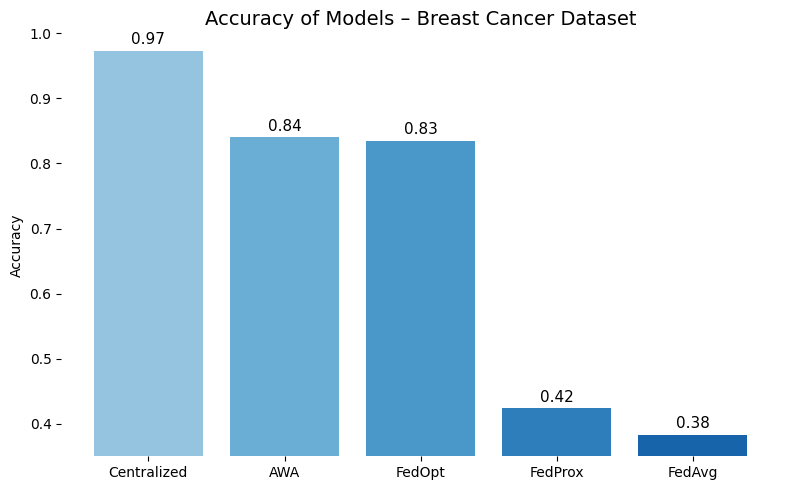

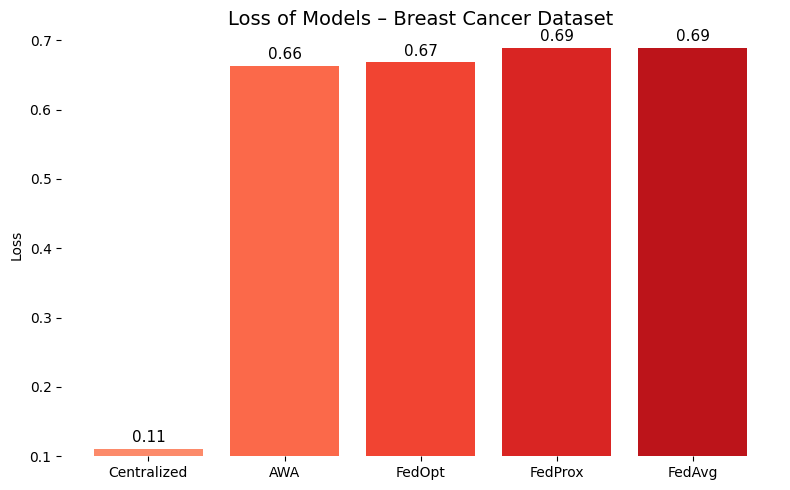

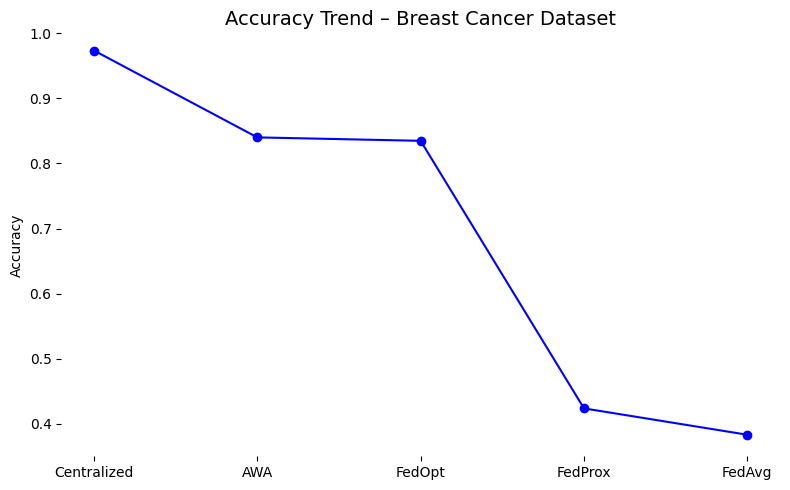

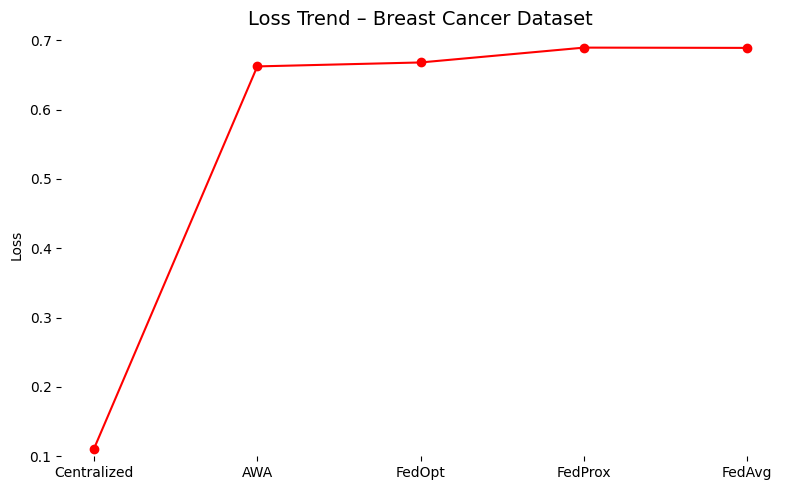

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Breast Cancer Dataset - 5 Rounds Results
data = [
    {"Method": "Centralized", "Accuracy": 0.9736, "Loss": 0.1108},
    {"Method": "AWA", "Accuracy": 0.8401, "Loss": 0.6623},
    {"Method": "FedOpt", "Accuracy": 0.8348, "Loss": 0.6680},
    {"Method": "FedProx", "Accuracy": 0.4236, "Loss": 0.6894},
    {"Method": "FedAvg", "Accuracy": 0.3831, "Loss": 0.6890}
]

df = pd.DataFrame(data)
df = df.round(4)

# Gradient colors
colors_acc = cm.Blues(np.linspace(0.4, 0.8, len(df)))
colors_loss = cm.Reds(np.linspace(0.4, 0.8, len(df)))

# 1. Accuracy Histogram
plt.figure(figsize=(8, 5))
bars = plt.bar(df["Method"], df["Accuracy"], color=colors_acc)
plt.title("Accuracy of Models – Breast Cancer Dataset", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.35, 1.0)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.01, f'{height:.2f}', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

# 2. Loss Histogram
plt.figure(figsize=(8, 5))
bars = plt.bar(df["Method"], df["Loss"], color=colors_loss)
plt.title("Loss of Models – Breast Cancer Dataset", fontsize=14)
plt.ylabel("Loss")
plt.ylim(0.10, 0.71)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.01, f'{height:.2f}', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

# 3. Accuracy Trend Line
plt.figure(figsize=(8, 5))
plt.plot(df["Method"], df["Accuracy"], marker='o', linestyle='-', color='blue')
plt.title("Accuracy Trend – Breast Cancer Dataset", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.35, 1.0)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()

# 4. Loss Trend Line
plt.figure(figsize=(8, 5))
plt.plot(df["Method"], df["Loss"], marker='o', linestyle='-', color='red')
plt.title("Loss Trend – Breast Cancer Dataset", fontsize=14)
plt.ylabel("Loss")
plt.ylim(0.10, 0.71)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()


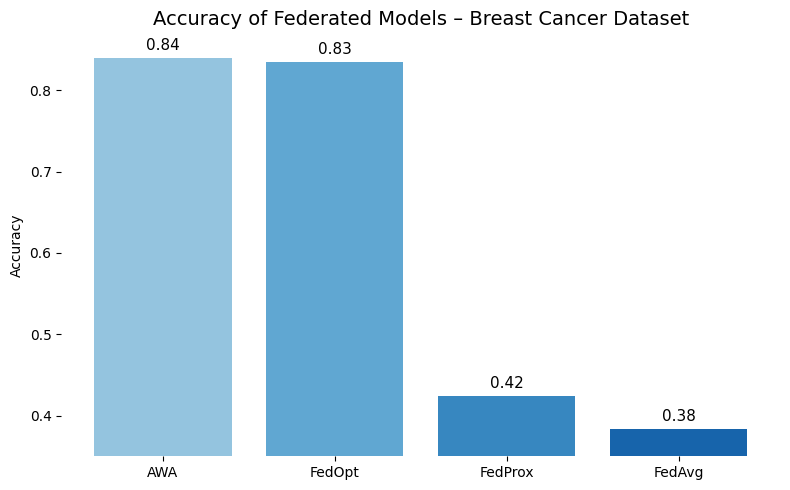

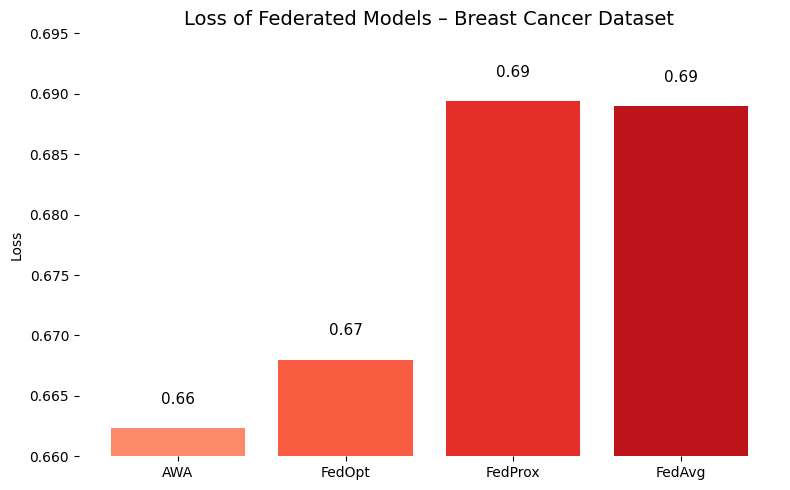

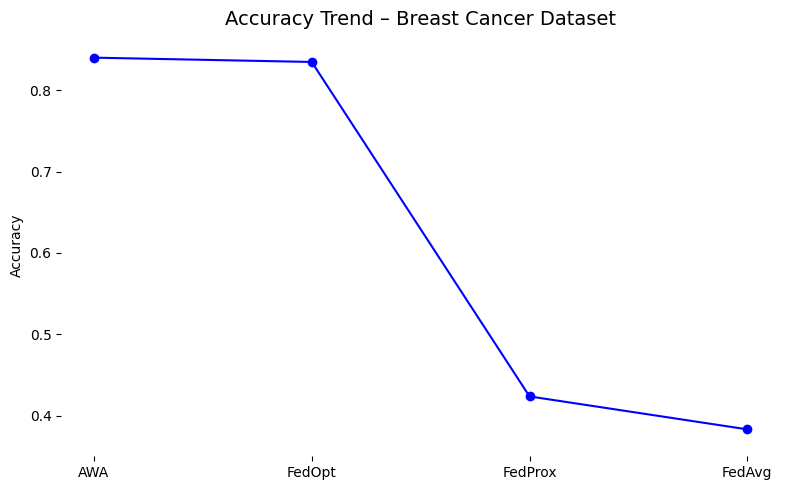

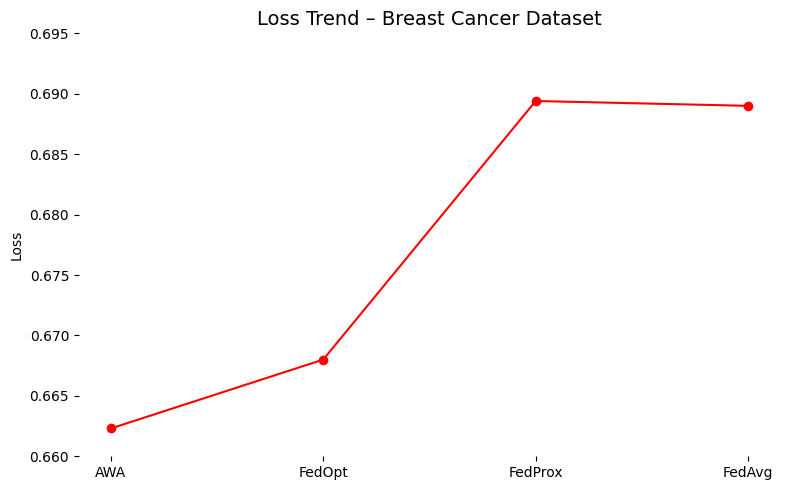

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Breast Cancer Dataset – Federated Models Only (5 Rounds)
data = [
    {"Method": "AWA", "Accuracy": 0.8401, "Loss": 0.6623},
    {"Method": "FedOpt", "Accuracy": 0.8348, "Loss": 0.6680},
    {"Method": "FedProx", "Accuracy": 0.4236, "Loss": 0.6894},
    {"Method": "FedAvg", "Accuracy": 0.3831, "Loss": 0.6890}
]

df = pd.DataFrame(data)
df = df.round(4)

# Gradient colors
colors_acc = cm.Blues(np.linspace(0.4, 0.8, len(df)))
colors_loss = cm.Reds(np.linspace(0.4, 0.8, len(df)))

# 1. Accuracy Histogram
plt.figure(figsize=(8, 5))
bars = plt.bar(df["Method"], df["Accuracy"], color=colors_acc)
plt.title("Accuracy of Federated Models – Breast Cancer Dataset", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.35, 0.87)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{height:.2f}', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

# 2. Loss Histogram
plt.figure(figsize=(8, 5))
bars = plt.bar(df["Method"], df["Loss"], color=colors_loss)
plt.title("Loss of Federated Models – Breast Cancer Dataset", fontsize=14)
plt.ylabel("Loss")
plt.ylim(0.66, 0.695)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.002, f'{height:.2f}', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

# 3. Accuracy Trend Line
plt.figure(figsize=(8, 5))
plt.plot(df["Method"], df["Accuracy"], marker='o', linestyle='-', color='blue')
plt.title("Accuracy Trend – Breast Cancer Dataset", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.35, 0.87)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()

# 4. Loss Trend Line
plt.figure(figsize=(8, 5))
plt.plot(df["Method"], df["Loss"], marker='o', linestyle='-', color='red')
plt.title("Loss Trend – Breast Cancer Dataset", fontsize=14)
plt.ylabel("Loss")
plt.ylim(0.66, 0.695)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Breast Cancer Dataset – All Models (5 Rounds)
data = [
    {"Method": "Centralized", "Accuracy": 0.9736, "Loss": 0.1108},
    {"Method": "AWA", "Accuracy": 0.8401, "Loss": 0.6623},
    {"Method": "FedOpt", "Accuracy": 0.8348, "Loss": 0.6680},
    {"Method": "FedProx", "Accuracy": 0.4236, "Loss": 0.6894},
    {"Method": "FedAvg", "Accuracy": 0.3831, "Loss": 0.6890}
]

df = pd.DataFrame(data)
df = df.round(4)

# Display the table
print("Comparison Table – All Models (Breast Cancer Dataset):\n")
print(df.to_string(index=False))


Comparison Table – All Models (Breast Cancer Dataset):

     Method  Accuracy   Loss
Centralized    0.9736 0.1108
        AWA    0.8401 0.6623
     FedOpt    0.8348 0.6680
    FedProx    0.4236 0.6894
     FedAvg    0.3831 0.6890
